In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, fft

https://stackoverflow.com/questions/77058790/how-to-fit-data-with-a-cosine-function-and-increasing-oscillations-in-python

In [18]:
x = np.array(list(reversed([
    1.19995117, 1.14990234, 1.10009766, 1.05004883, 1.,
    0.94995117, 0.89990234, 0.85009766, 0.80004883, 0.75,
    0.69995117, 0.64990234, 0.60009766, 0.55004883, 0.5,
    0.44995117, 0.39990234, 0.35009766, 0.30004883, 0.25,
    0.19995117, 0.14990234, 0.10009766
])))

y = np.array(list(reversed([
    -4.48635472, -7.46744701, -1.64572445,  0.066374  , -2.38919002,
    -7.16421132, -0.96261029, -4.50088441, -1.74462464, -4.26446956,
    -3.38185233, -1.80706345, -1.14412059, -2.64494386, -1.37471773,
    -1.53031754, -2.00849513, -0.48058228, -0.16275403, -0.10673643,
    -1.06832094, -0.13781298,  0.91363212
])))

In [19]:
np.diff(x)

array([0.04980468, 0.05004883, 0.05004883, 0.05004883, 0.05004883,
       0.04980468, 0.05004883, 0.05004883, 0.05004883, 0.05004883,
       0.04980468, 0.05004883, 0.05004883, 0.05004883, 0.05004883,
       0.04980468, 0.05004883, 0.05004883, 0.05004883, 0.05004883,
       0.04980468, 0.05004883])

In [27]:
Y = fft.fft(y)
f = fft.fftfreq(Y.size)

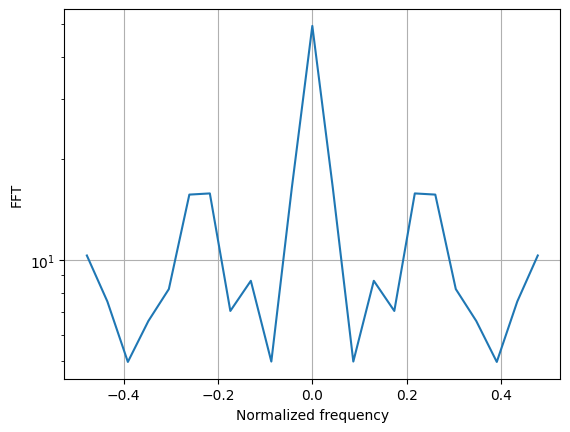

In [41]:
fig, axe = plt.subplots()
axe.semilogy(fft.fftshift(f), np.abs(fft.fftshift(Y)))
axe.set_xlabel("Normalized frequency")
axe.set_ylabel("FFT")
axe.grid()

In [38]:
def expcos_(x, i0, a, w1, ph, off):
      return i0 + (1-i0)*np.exp(-x/w1) + a*np.cos((2*np.pi/w1)*(x - ph)) + off

In [53]:
def expcos(x, i0, a, w1, ph):
      return i0 + (1-i0)*np.exp(-x/w1) + a*np.cos((2*np.pi/w1)*x - ph)

In [54]:
popt, pcov = optimize.curve_fit(expcos, x, y)

In [55]:
popt

array([-8.33329514,  0.10977153,  1.49180199,  5.12278309])

In [56]:
pcov

array([[31085.89060164, -1606.78923225, -7000.15907333, 10090.85839745],
       [-1606.78923225,    83.37659264,   361.86956705,  -520.58503168],
       [-7000.15907333,   361.86956705,  1576.42961844, -2271.47330727],
       [10090.85839745,  -520.58503168, -2271.47330727,  3309.472622  ]])

In [57]:
xlin = np.linspace(0, 1.4, 200)

In [58]:
yhat = expcos(xlin, *popt)

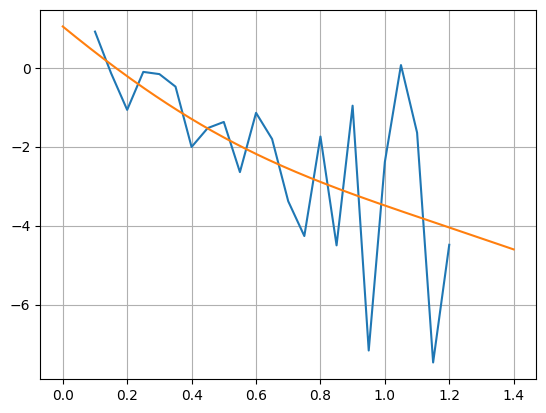

In [59]:
fig, axe = plt.subplots()
axe.plot(x, y)
axe.plot(xlin, yhat)
axe.grid()

In [60]:
print(x)

[0.10009766 0.14990234 0.19995117 0.25       0.30004883 0.35009766
 0.39990234 0.44995117 0.5        0.55004883 0.60009766 0.64990234
 0.69995117 0.75       0.80004883 0.85009766 0.89990234 0.94995117
 1.         1.05004883 1.10009766 1.14990234 1.19995117]


In [62]:
y

array([ 0.91363212, -0.13781298, -1.06832094, -0.10673643, -0.16275403,
       -0.48058228, -2.00849513, -1.53031754, -1.37471773, -2.64494386,
       -1.14412059, -1.80706345, -3.38185233, -4.26446956, -1.74462464,
       -4.50088441, -0.96261029, -7.16421132, -2.38919002,  0.066374  ,
       -1.64572445, -7.46744701, -4.48635472])